In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import dask.dataframe as dd
from pathlib import Path
import glob

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")

In [3]:
import data_handling as dh
import subsampling as ss
from core import SITE_NAMES, FREQ_GROUPS, DC_COLOR_MAPPINGS

from cli import get_file_paths
import plotting
import pipeline

In [4]:
type_key = ''
site_key = "Carp"
# cycle_lengths = [1800, 720, 600, 360, 180, 60, 30, 6]
cycle_lengths = [1800, 360]
percent_ons = [0.1667]
specific_dc_tag = "1800of1800"

In [5]:
pipeline_params = dict()
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = True
pipeline_params["save_presence_grid"] = True
pipeline_params["save_dc_night_comparisons"] = True
pipeline_params["save_activity_dc_comparisons"] = True
pipeline_params["save_presence_dc_comparisons"] = True
pipeline_params["show_plots"] = False
pipeline_params["show_PST"] = True
pipeline_params

{'read_csv': False,
 'save_activity_grid': True,
 'save_presence_grid': True,
 'save_dc_night_comparisons': True,
 'save_activity_dc_comparisons': True,
 'save_presence_dc_comparisons': True,
 'show_plots': False,
 'show_PST': True}

In [6]:
data_params = dict()
data_params["site_name"] = SITE_NAMES[site_key]
data_params["site_tag"] = site_key
data_params["type_tag"] = type_key
data_params["freq_tags"] = FREQ_GROUPS[type_key]
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['resolution_in_min'] = '30'
data_params['recording_start'] = '02:00'
data_params['recording_end'] = '13:30'
data_params

{'site_name': 'Carp Pond',
 'site_tag': 'Carp',
 'type_tag': '',
 'freq_tags': [0, 125000],
 'cycle_lengths': [1800, 360],
 'percent_ons': [0.1667],
 'dc_tags': ['1800of1800', '300of1800', '60of360'],
 'cur_dc_tag': '1800of1800',
 'resolution_in_min': '30',
 'recording_start': '02:00',
 'recording_end': '13:30'}

In [7]:
file_paths = get_file_paths(data_params)
file_paths

{'raw_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/raw/Carp',
 'SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp',
 'bd2_TYPE_SITE_YEAR': 'bd2__Carp_2022',
 'duty_cycled_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled',
 'dc_dets_TYPE_SITE_summary': 'dc_dets_Carp_summary',
 'dc_bouts_TYPE_SITE_summary': 'dc_bouts_Carp_summary',
 'dc_inds_TYPE_SITE_summary': 'dc_inds_Carp_summary',
 'simulated_schemes_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../data/2022_bd2_summary/Carp/duty_cycled/simulated_schemes',
 'figures_SITE_folder': '/Users/adityakrishna/duty-cycle-investigation/src/../figures/Carp',
 'activity_det_comparisons_figname': 'activity_det_comparisons_per_dc_Carp',
 'dc_det_comparisons_figname': 'dc_det_comparisons_per_night_Carp',
 'activity_bout_comparisons_figname': 'activity_bout_comparisons_per_dc_Carp',
 'dc_bout_comparisons_figname

In [8]:
activity_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)

In [9]:
activity_arr

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-07-13 02:00:00                                0.0   
2022-07-13 02:30:00                                0.0   
2022-07-13 03:00:00                                0.0   
2022-07-13 03:30:00                                0.0   
2022-07-13 04:00:00                                0.0   
...                                                ...   
2022-08-25 11:00:00                               19.0   
2022-08-25 11:30:00                               17.0   
2022-08-25 12:00:00                              230.0   
2022-08-25 12:30:00                              142.0   
2022-08-25 13:00:00                                0.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-07-13 02:00:00                               0.0   
2022-07-13 02:30:00                               0.0   
2022-07-13 03:00:00                               0.0   
2022-07-13 03:30:00                               0.0   
2022-07-13 04:00:00                               0.0   
...                                               ...   
2022-08-25 11:00:00                              15.0   
2022-08-25 11:30:00                              17.0   
2022-08-25 12:00:00                               3.0   
2022-08-25 12:30:00                              94.0   
2022-08-25 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-07-13 02:00:00                             0.0  
2022-07-13 02:30:00                             0.0  
2022-07-13 03:00:00                             0.0  
2022-07-13 03:30:00                             0.0  
2022-07-13 04:00:00                             0.0  
...                                             ...  
2022-08-25 11:00:00                            15.0  
2022-08-25 11:30:00                             0.0  
2022-08-25 12:00:00                            40.0  
2022-08-25 12:30:00                            59.0  
2022-08-25 13:00:00                             0.0  

[1012 rows x 3 columns]

In [10]:
dh.construct_activity_grid_for_number_of_dets(activity_arr, "1800of1800")

Date (UTC)  07/13/22  07/14/22  07/15/22  07/16/22  07/17/22  07/18/22  \
Time (UTC)                                                               
02:00            0.0       0.0       0.0       1.0       0.0       0.0   
02:30            0.0       0.0       0.0       2.0       1.0       1.0   
03:00            0.0       0.0       0.0       0.0       1.0       0.0   
03:30            0.0       0.0       0.0       0.0       0.0       0.0   
04:00            0.0       0.0       0.0      13.0       0.0       0.0   
04:30           43.0       0.0       4.0     187.0      32.0     129.0   
05:00          139.0      37.0      72.0     818.0     199.0     201.0   
05:30          311.0      37.0     301.0    3908.0     307.0    3438.0   
06:00          127.0     136.0    2973.0    4179.0     317.0    2932.0   
06:30           46.0     276.0    3141.0    3708.0     911.0     406.0   
07:00          475.0      44.0    2470.0    5787.0    2218.0    2211.0   
07:30          334.0      25.0    2016.0    3489.0    1313.0    1297.0   
08:00           22.0     441.0     374.0    2984.0     743.0    2976.0   
08:30           92.0     898.0     331.0    2491.0     700.0    1756.0   
09:00          135.0     193.0     818.0    1367.0     280.0     963.0   
09:30           66.0      81.0     238.0    2156.0     157.0     451.0   
10:00           25.0       9.0     206.0    1853.0      35.0     301.0   
10:30           66.0      36.0     278.0     214.0     313.0     345.0   
11:00           18.0       0.0     263.0     106.0     128.0      14.0   
11:30            0.0       0.0       0.0       0.0      52.0      14.0   
12:00            0.0       0.0       0.0       0.0       0.0       0.0   
12:30            0.0       0.0       0.0       0.0       0.0       1.0   
13:00            0.0       0.0       NaN       0.0       0.0       0.0   

Date (UTC)  07/19/22  07/20/22  07/21/22  07/22/22  ...  08/16/22  08/17/22  \
Time (UTC)                                          ...                       
02:00            0.0       0.0       0.0       1.0  ...       0.0       0.0   
02:30            0.0       0.0       0.0       0.0  ...       0.0       0.0   
03:00            0.0       2.0       3.0       2.0  ...       0.0       0.0   
03:30            0.0       0.0       1.0       1.0  ...       0.0      49.0   
04:00            0.0       1.0       0.0       1.0  ...     324.0     658.0   
04:30          175.0      72.0      84.0      23.0  ...    3908.0     484.0   
05:00          256.0     115.0     461.0     920.0  ...     841.0    3984.0   
05:30          294.0     433.0     313.0    1370.0  ...     483.0    5248.0   
06:00          239.0     958.0     586.0     423.0  ...     636.0    1156.0   
06:30          150.0     397.0     675.0     345.0  ...     256.0    1194.0   
07:00           57.0    5203.0     192.0    5124.0  ...     774.0     633.0   
07:30          243.0    5784.0     328.0    8244.0  ...     485.0      63.0   
08:00           93.0    5096.0     486.0    9401.0  ...     184.0     194.0   
08:30          233.0    6720.0    2826.0    7586.0  ...      37.0      28.0   
09:00           20.0    7346.0    3178.0    8722.0  ...     147.0      14.0   
09:30          160.0    8556.0    5605.0    5731.0  ...      20.0       2.0   
10:00            4.0    7629.0    4181.0    1039.0  ...      32.0       9.0   
10:30           30.0    5670.0    3848.0    2642.0  ...      68.0      33.0   
11:00          235.0    6528.0    3226.0    5029.0  ...      47.0      31.0   
11:30            2.0     241.0     204.0    2569.0  ...       1.0      11.0   
12:00            1.0       1.0       3.0       0.0  ...     730.0      34.0   
12:30            0.0       2.0       2.0       0.0  ...       0.0       0.0   
13:00            0.0       0.0       2.0       1.0  ...       0.0       0.0   

Date (UTC)  08/18/22  08/19/22  08/20/22  08/21/22  08/22/22  08/23/22  \
Time (UTC)                                                               
02:00            0.0     

In [11]:
activity_arr[-23:]

Number_of_Detections (1800of1800)  \
Date_and_Time_UTC                                        
2022-08-25 02:00:00                                0.0   
2022-08-25 02:30:00                                0.0   
2022-08-25 03:00:00                                0.0   
2022-08-25 03:30:00                               67.0   
2022-08-25 04:00:00                              175.0   
2022-08-25 04:30:00                               47.0   
2022-08-25 05:00:00                               78.0   
2022-08-25 05:30:00                              153.0   
2022-08-25 06:00:00                              341.0   
2022-08-25 06:30:00                              290.0   
2022-08-25 07:00:00                              183.0   
2022-08-25 07:30:00                              264.0   
2022-08-25 08:00:00                              444.0   
2022-08-25 08:30:00                              192.0   
2022-08-25 09:00:00                              457.0   
2022-08-25 09:30:00                              750.0   
2022-08-25 10:00:00                              331.0   
2022-08-25 10:30:00                               83.0   
2022-08-25 11:00:00                               19.0   
2022-08-25 11:30:00                               17.0   
2022-08-25 12:00:00                              230.0   
2022-08-25 12:30:00                              142.0   
2022-08-25 13:00:00                                0.0   

                     Number_of_Detections (300of1800)  \
Date_and_Time_UTC                                       
2022-08-25 02:00:00                               0.0   
2022-08-25 02:30:00                               0.0   
2022-08-25 03:00:00                               0.0   
2022-08-25 03:30:00                               0.0   
2022-08-25 04:00:00                              18.0   
2022-08-25 04:30:00                              10.0   
2022-08-25 05:00:00                               0.0   
2022-08-25 05:30:00                               0.0   
2022-08-25 06:00:00                               7.0   
2022-08-25 06:30:00                              24.0   
2022-08-25 07:00:00                              18.0   
2022-08-25 07:30:00                               0.0   
2022-08-25 08:00:00                              29.0   
2022-08-25 08:30:00                               8.0   
2022-08-25 09:00:00                             376.0   
2022-08-25 09:30:00                              43.0   
2022-08-25 10:00:00                             160.0   
2022-08-25 10:30:00                              15.0   
2022-08-25 11:00:00                              15.0   
2022-08-25 11:30:00                              17.0   
2022-08-25 12:00:00                               3.0   
2022-08-25 12:30:00                              94.0   
2022-08-25 13:00:00                               0.0   

                     Number_of_Detections (60of360)  
Date_and_Time_UTC                                    
2022-08-25 02:00:00                             0.0  
2022-08-25 02:30:00                             0.0  
2022-08-25 03:00:00                             0.0  
2022-08-25 03:30:00                             0.0  
2022-08-25 04:00:00                            54.0  
2022-08-25 04:30:00                            10.0  
2022-08-25 05:00:00                            19.0  
2022-08-25 05:30:00                             0.0  
2022-08-25 06:00:00                            93.0  
2022-08-25 06:30:00                            24.0  
2022-08-25 07:00:00                            13.0  
2022-08-25 07:30:00                             5.0  
2022-08-25 08:00:00                           106.0  
2022-08-25 08:30:00                            21.0  
2022-08-25 09:00:00                           129.0  
2022-08-25 09:30:00                           110.0  
2022-08-25 10:00:00                            77.0  
2022-08-25 10:30:00                             5.0  
2022-08-25 11:00:00                            15.0  
2022-08-25

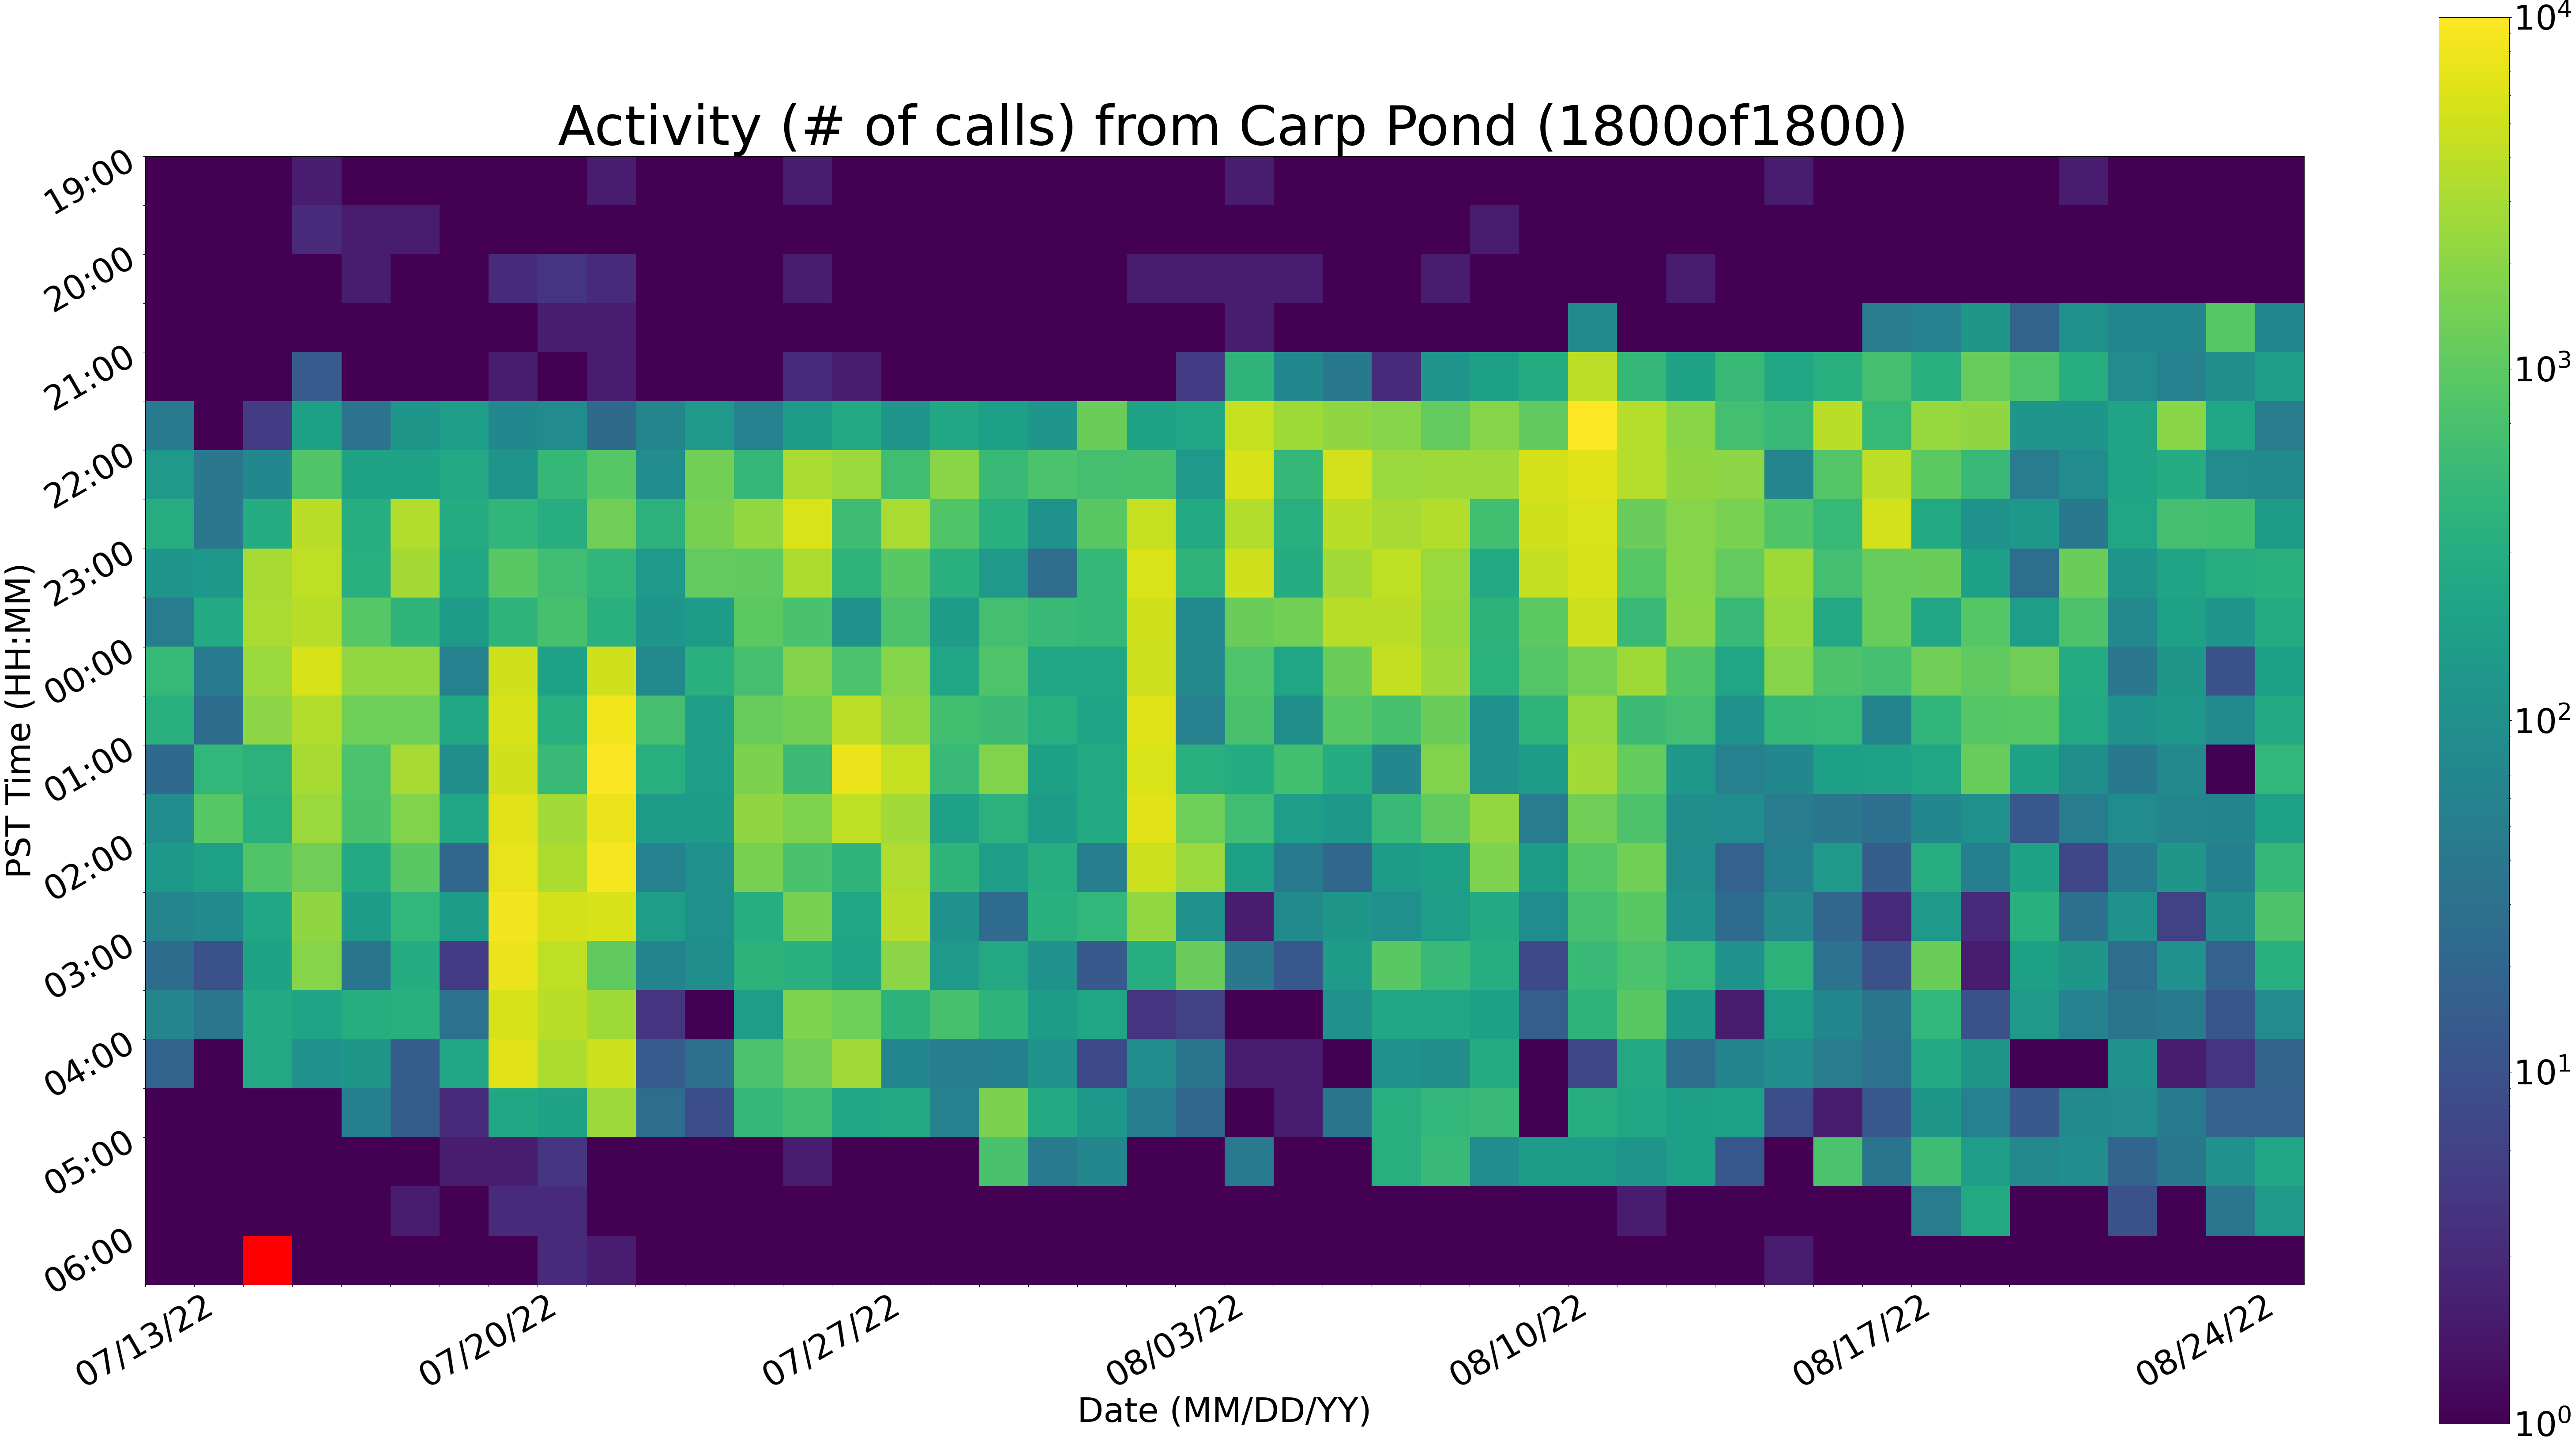

In [12]:
plotting.plot_activity_grid_for_dets(dh.construct_activity_grid_for_number_of_dets(activity_arr, data_params["cur_dc_tag"]), data_params, pipeline_params, file_paths)

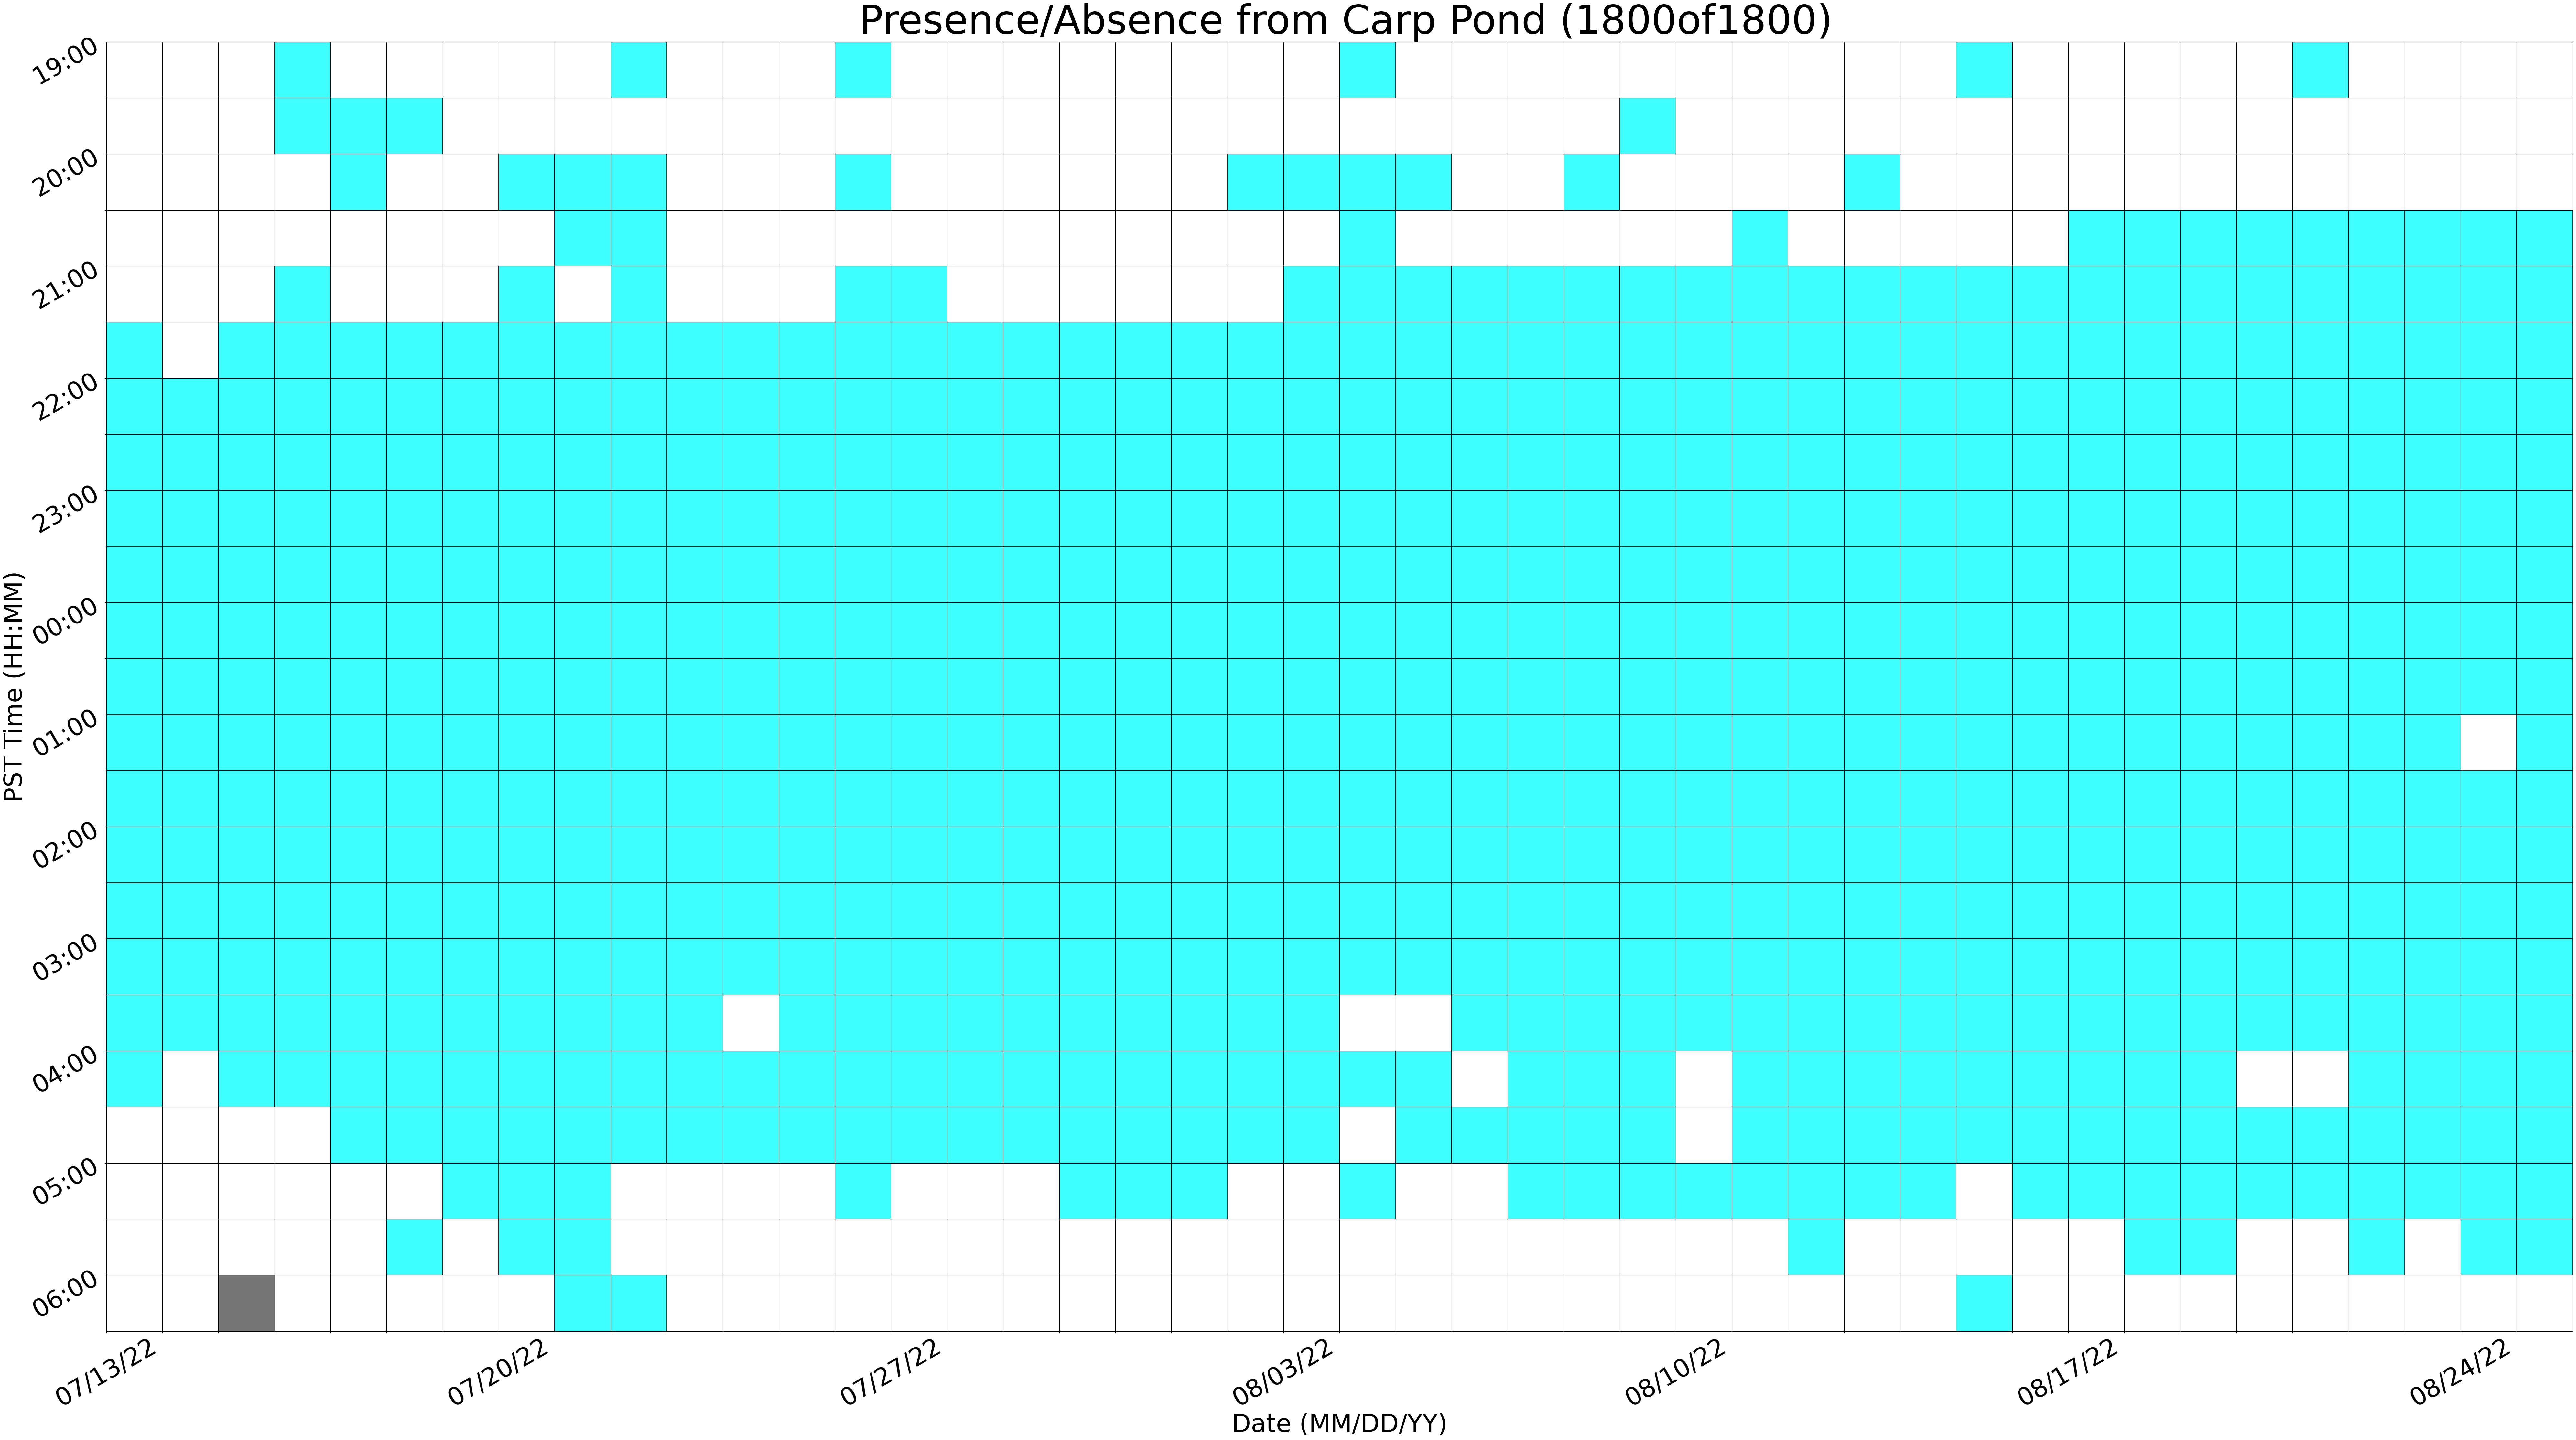

In [13]:
plotting.plot_presence_grid(dh.construct_presence_grid(activity_arr, data_params["cur_dc_tag"]), data_params, pipeline_params, file_paths)
# plotting.plot_dc_dets_comparisons_per_night(activity_arr, data_params, pipeline_params, file_paths)

In [14]:
plotting.plot_dc_det_activity_comparisons_per_scheme(activity_arr, data_params, pipeline_params, file_paths)

In [15]:
plotting.plot_dc_presence_comparisons_per_scheme(activity_arr, data_params, pipeline_params, file_paths)

In [16]:
# pipeline.plot_dets(activity_arr, data_params, pipeline_params, file_paths)